# MNIST Digit Classifier Lab Solution

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm.notebook import tqdm

In [2]:
# this lets us use GPU, if one is available
if torch.cuda.is_available():
    device = torch.device("cuda:0")  
    print("Running on gpu")
# this is Apple's GPU, if there exists one
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Running on mps")
# Otherwise CPU, which will be much slower
else:
    device = torch.device("cpu")
    print("Running on cpu")

Running on mps


In [3]:
# constants. don't touch or things may break
input_size = 784 # (28 * 28) images
num_classes = 10

# hyperparams. You can play around with these
hidden1_size = 256
hidden2_size = 64
num_epochs = 10
batch_size = 128
learning_rate = .0001

In [4]:
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor(), download = True)

In [5]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

torch.Size([128, 1, 28, 28]) torch.Size([128])


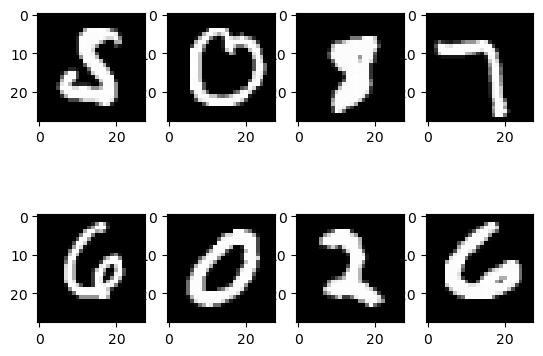

In [6]:
samples, labels = next(iter(train_loader))
print(samples.shape, labels.shape)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, hidden1_size, hidden2_size):
        super(NeuralNet, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, num_classes),
        )

    def forward(self, x):
        return self.network(x)


In [8]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, hidden1_size, hidden2_size):
        super(NeuralNet, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, num_classes),
        )

    def forward(self, x):
        return self.network(x)

In [9]:
# Alt
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, hidden1_size, hidden2_size):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden1_size)
        self.l2 = nn.Linear(hidden1_size, hidden2_size)
        self.l3 = nn.Linear(hidden2_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = F.relu(out)
        out = self.l2(out)
        out = F.relu(out)
        out = self.l3(out)
        return out

In [10]:
model = NeuralNet(input_size, num_classes, hidden1_size, hidden2_size).to(device)

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)
losses = []

In [12]:
# Training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # do forward pass on images
        outputs = model(images)
        # calculate loss
        loss = loss_fn(outputs, labels)

        optimiser.zero_grad()
        # perform backward propagration on loss
        loss.backward()
        optimiser.step()

        if (i + 1) % 100 == 0:
            print (f'epoch = [{epoch+1}/{num_epochs}], step = [{i+1}/{n_total_steps}], loss = {loss.item()}')
    losses.append(loss.item())

epoch = [1/10], step = [100/469], loss = 1.7062177658081055
epoch = [1/10], step = [200/469], loss = 0.9244897961616516
epoch = [1/10], step = [300/469], loss = 0.6781923174858093
epoch = [1/10], step = [400/469], loss = 0.4993491470813751
epoch = [2/10], step = [100/469], loss = 0.39765071868896484
epoch = [2/10], step = [200/469], loss = 0.411540150642395
epoch = [2/10], step = [300/469], loss = 0.30071765184402466
epoch = [2/10], step = [400/469], loss = 0.34375450015068054
epoch = [3/10], step = [100/469], loss = 0.29827505350112915
epoch = [3/10], step = [200/469], loss = 0.2751692831516266
epoch = [3/10], step = [300/469], loss = 0.1921023577451706
epoch = [3/10], step = [400/469], loss = 0.2836904525756836
epoch = [4/10], step = [100/469], loss = 0.2626779079437256
epoch = [4/10], step = [200/469], loss = 0.3471788763999939
epoch = [4/10], step = [300/469], loss = 0.3127724528312683
epoch = [4/10], step = [400/469], loss = 0.24417683482170105
epoch = [5/10], step = [100/469], lo

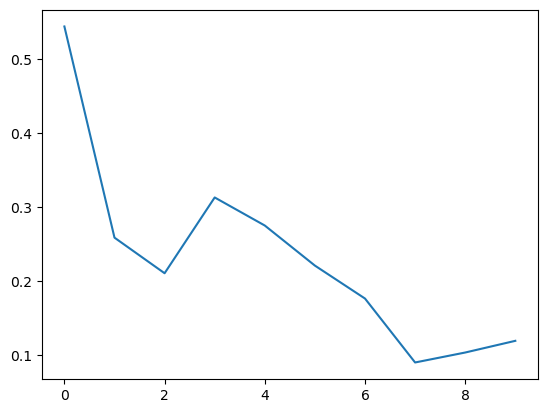

In [13]:
plt.plot(losses)

In [14]:
# evaluation on the test dataset
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += len(labels)
        n_correct += (predictions == labels).sum().item()
    accuracy = n_correct / n_samples
    print(f'{(accuracy*100):.3}%')

95.4%
